# Project final # 
#### Akbar Ismatullayev 17376021, Jairoop Brar 19169291, Jaime Keith, Ian Yoon ###

In [1]:
library(tidyverse)
library(lubridate)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)

options(repr.plot.width = 14, repr.plot.height = 7)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Reading the data for analysing

In [135]:
players <- read_csv("https://raw.githubusercontent.com/Aki175/Project-Final-Report/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Aki175/Project-Final-Report/d0928b9f4c531b082f0723b703d039119267ee5c/data/sessions.csv")

head(sessions)
head(players)

# quick sense-check on dimensions
dim(players)
dim(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196   7

[1] 1535    5

## Introduction

#### About the data

The data this report will be analyzing comes from The Pacific Laboratory for Artificial Intelligence right here at UBC. They set up a minecraft server called PLAICraft and record play sessions with the goal of understanding how people play video games in order to advance artificial intelligence. They collected a set of data on the players on their server and are interested to know what kinds of players are the most likely to contribute more data so they can target them in their recruitment efforts. 

#### Data Description: ###


In [3]:
glimpse(players)
glimpse(sessions)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

- There are **196** Total Observations
- There are **7** Total Variables
- Below is a table including every variable name, data type, and explanation:

|Variable|Data Type|Explanation|
|--------|--------|--------|
|`experience`|factor (~~character~~)|The self-identified Minecraft skill/experience level of each player<br>(includes: `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`|
|`subscribed`|logical|Whether each player is subscribed to the game-related newsletter or not<br>(`TRUE` if subscribed, `FALSE` if not)|
|`hashed_email`|character|64-digit hash which scrambles and encrypts each player's email<br>(this is done to hide player's real emails, with a unique string for each email)|
|`played_hours`|double|Total number of hours each player has played on the server|
|`name`|character|The submitted name of each player|
|`gender`|factor (~~character~~)|The self-identified gender of each player (includes: `Male`, `Female`,<br>`Non-binary`, `Two-Spirited`, `Agender`, `Other`, and `Prefer not to say`)|
|`age`|integer (~~double~~)|The submitted age of each player|

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **Table 1**: Each variable from the 'players.csv' dataset, including their name, data type 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; (previous data types from raw file were strikethroughed in brackets if changed 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; later in wrangling), and an explanation.

- Below is a table including the summary statistics for the quantitative variables (hours_played and age) are as follows (more summary statistics can be found in the following cells):

|Variable|Mean|Maximum|Minimum|
|--------|--------|--------|--------|
|`played_hours`|5.85|223.10|0.00|
|`age`|21.14|58|0|

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **Table 2**: Summary statistics for each quantitative variable in the 'players.csv' dataset,
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; including the mean, maximum value, and minimum value.

Some issues that appear in the dataset are that the age variable has some 'NA' values, which we would have to work around. Additionally, although we can't see it in the dataset itself, some players could have lied about either their age, name, gender, or they could have given a fake email, which we cannot explicitly identify, but it should be considered for later data analysis. Additionally, for the amount of hours played, some players could have had the Minecraft server running in the background, or could be AFK doing something else as their number of hours accumulate, which also cannot be identified, but should be taken into consideration.

#### Summary statistics

In [4]:
summary(players)
summary(sessions)


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

Looking at the summary, we notice that there are empty columns in age (players) and orginal_end_time (session). Which we need to be careful about. For the subscribe variable we notice it is very skewed, most players are subscribed so this variable is very imbalanced

##### Potential issues in short #####
* age and orginal_end_time has na values
* experience can be made as an ordinal feature so beginner = 1, intermediate = 2, advanced = 3, pro = 4.
* some players dont have play time so they dont have any game session.
* both original_start_time and original_end_time are almost the same or the same
* subscribe is very imbalanced so there more true values than false values which can mislead a classification model.

#### Project Statement

The question this report is investigating is: 

*Can age be used to predict the number of hours played and experience level on the server?*

To answer this, the following variables do support the research question:

 * ##### Age: the main predictor variable.

 * ##### Experience: an ordinal outcome measure of player skill.

 * ##### Played_hours: a continuous measure representing total time spent playing.

Variables including gender, subscribe and hashed_email do not contribute to the research question and are therefore excluded from further analysis.



## Methods & Results

### Minimal wrangling ####

Minimal cleaning was applied to ensure consistency across variable names and formats.
Column names were standardized and categorical variables were converted into factors to keep the ordening. Overall, the dataset was already tidy, where each column is a variable, each row is an observation, and each cell is a single value, so we did not have to tidy up the format of the data itself, but did clean up the variables.

In [5]:
#make the format consistent
players <- players |>
  rename(
    hashed_email = hashedEmail,
    age = Age
  )

sessions <- sessions |>
  rename(
    hashed_email = hashedEmail
  )

# mutate the player dataset since experience, subscribe and gender are factor data's. But experience has an order so we make it as an ordinal feature

players <- players |>
    filter(!is.na(age)) |>
    mutate(
        experience = factor(experience, levels = c("Beginner", "Amateur","Regular","Veteran","Pro")),
        subscribe  = as.factor(subscribe),
        gender     = as.factor(gender),
        log_played_hours = log(played_hours+1)
  )

### Exploratory Data Analysis

#### Summary Statistics

In [6]:
players_means <- players |> 
                 summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE)))
players_means

played_hours,age,log_played_hours
<dbl>,<dbl>,<dbl>
5.904639,21.13918,0.5086921


This indicates that the typical player is around 21 years old and plays just under 6 hours, but we don't know yet if there are any outliers or how this data is distributed. To check for this, we have to plot the distribution of total played hours among players, specifically, the number of players that fall in each number of total hours played.

#### Age vs. Total Minutes (Subscribers vs. Non-subscribers)

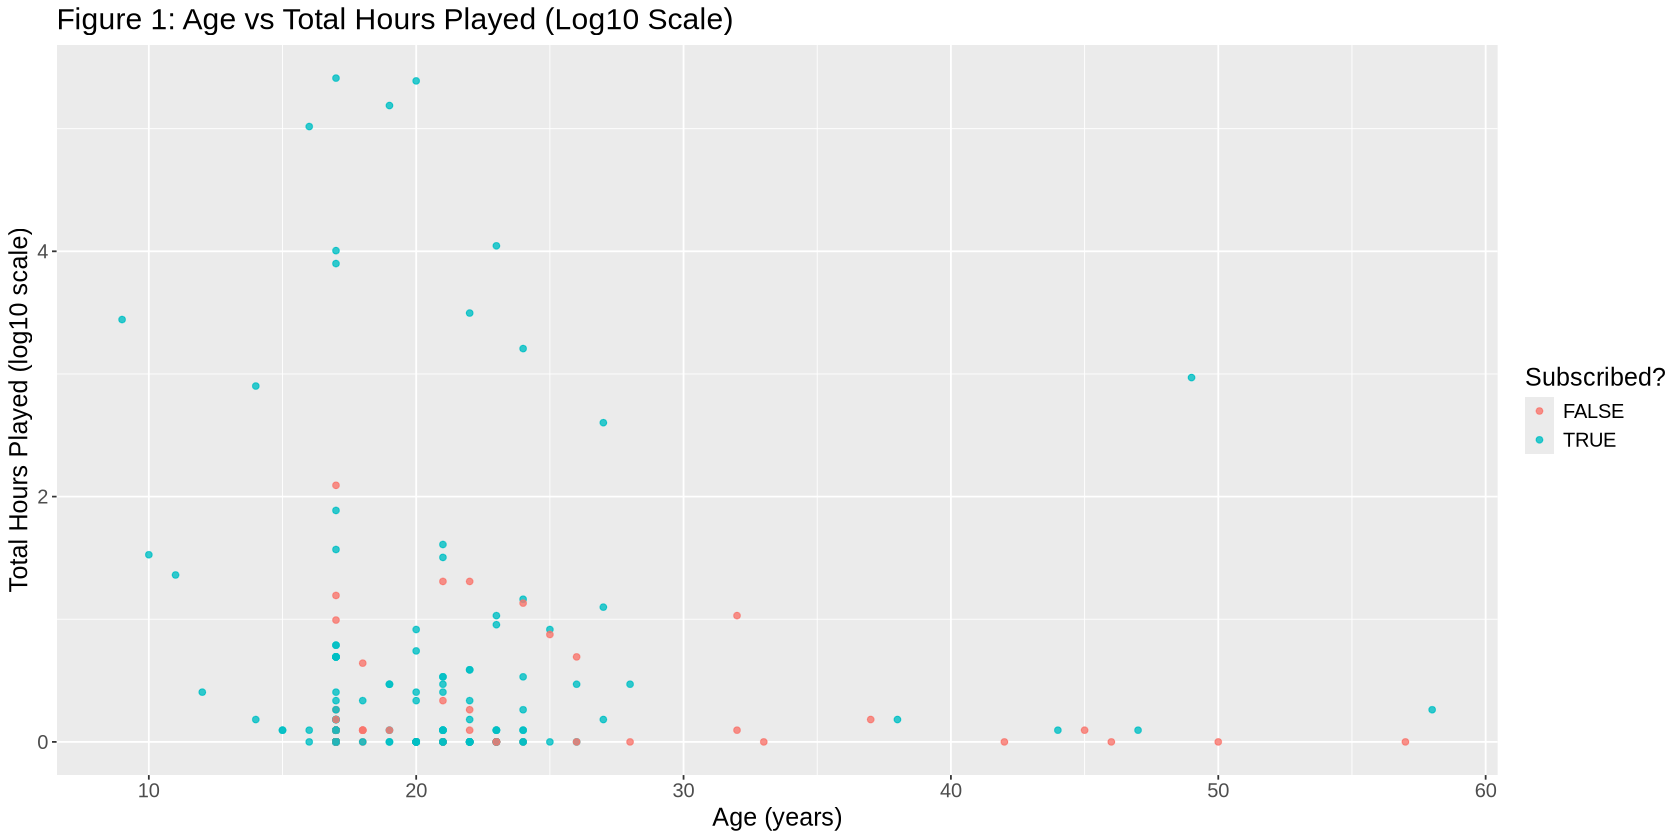

In [7]:
age_vs_log_hours_played <- players |>
    ggplot(aes(x = age, y = log_played_hours, colour = subscribe)) +
    geom_point(alpha = 0.8) +
    labs(x = "Age (years)", y = "Total Hours Played (log10 scale)", title = "Figure 1: Age vs Total Hours Played (Log10 Scale)", colour = 'Subscribed?') +
    theme(text = element_text(size = 15))
age_vs_log_hours_played

There's no strong relationship between playtime and age, as there's a high degree of variability in playtime for all ages. In addition, a line of fit would be a biased here given the lack of older players. Younger players (10-25 years old) have the widest diversity of total playtime. Here we see the most players with 0 playtime, as well as that small contingent of highly dedicated players with up to 150+ hours of playtime. Older players tend to be clustered into lower playtimes, presumably due to busier schedules, lower interest, or perhaps due to the aforementioned small sample size. There is however one single outlier, a 49 year old player with over 18 hours of playtime, far more than most players, even those in the younger demographic.

There does not appear to be strong correlation between age and subscription, but subscription and playtime may be connected. Non-subscribers are over represented in the 0 minutes-very low playtime region, it can be inferred that those willing to pay money for the service are more likely to engage and invest time into the server. Subscribers are also more prevalent throughout the data.

#### Player Age Distribution

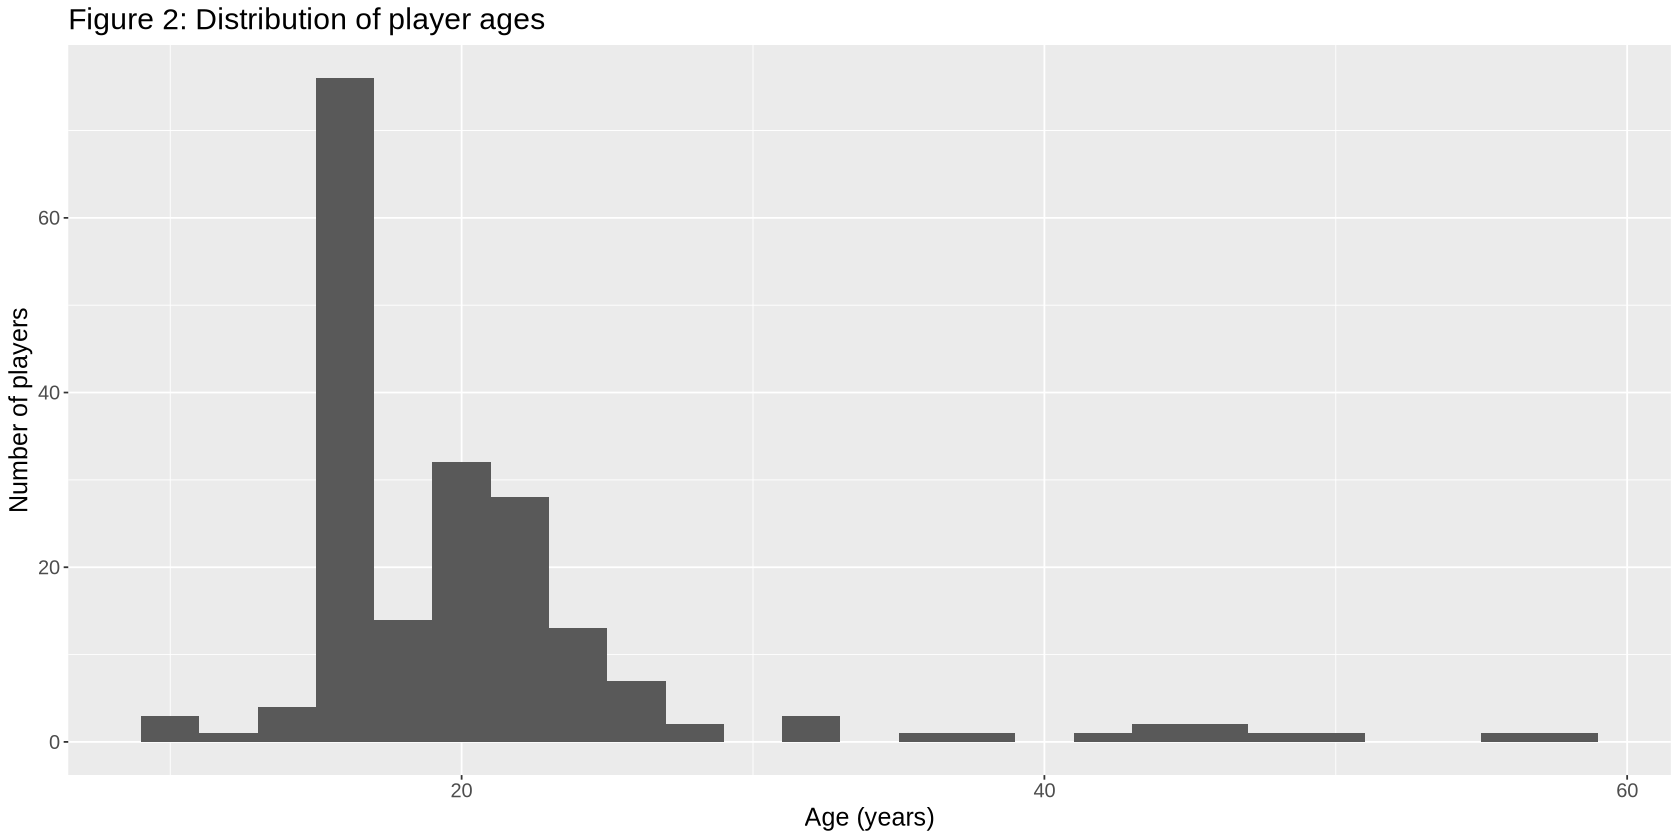

In [8]:
dist_players_age <- players |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 2) +
    labs(x = "Age (years)", y = "Number of players", title = "Figure 2: Distribution of player ages") +
    theme(text = element_text(size = 15))
dist_players_age

The bulk of server members are around 18 years old, with a sharp drop off after about 28 years old. After the 30-year mark, there are between 0-2 individuals per age range. This tracks with the general statistics for Minecraft players (citation needed), in addition to this being a UBC server, and thus more likely to attract college-age UBC students.

#### Distribution of Total Hours Played

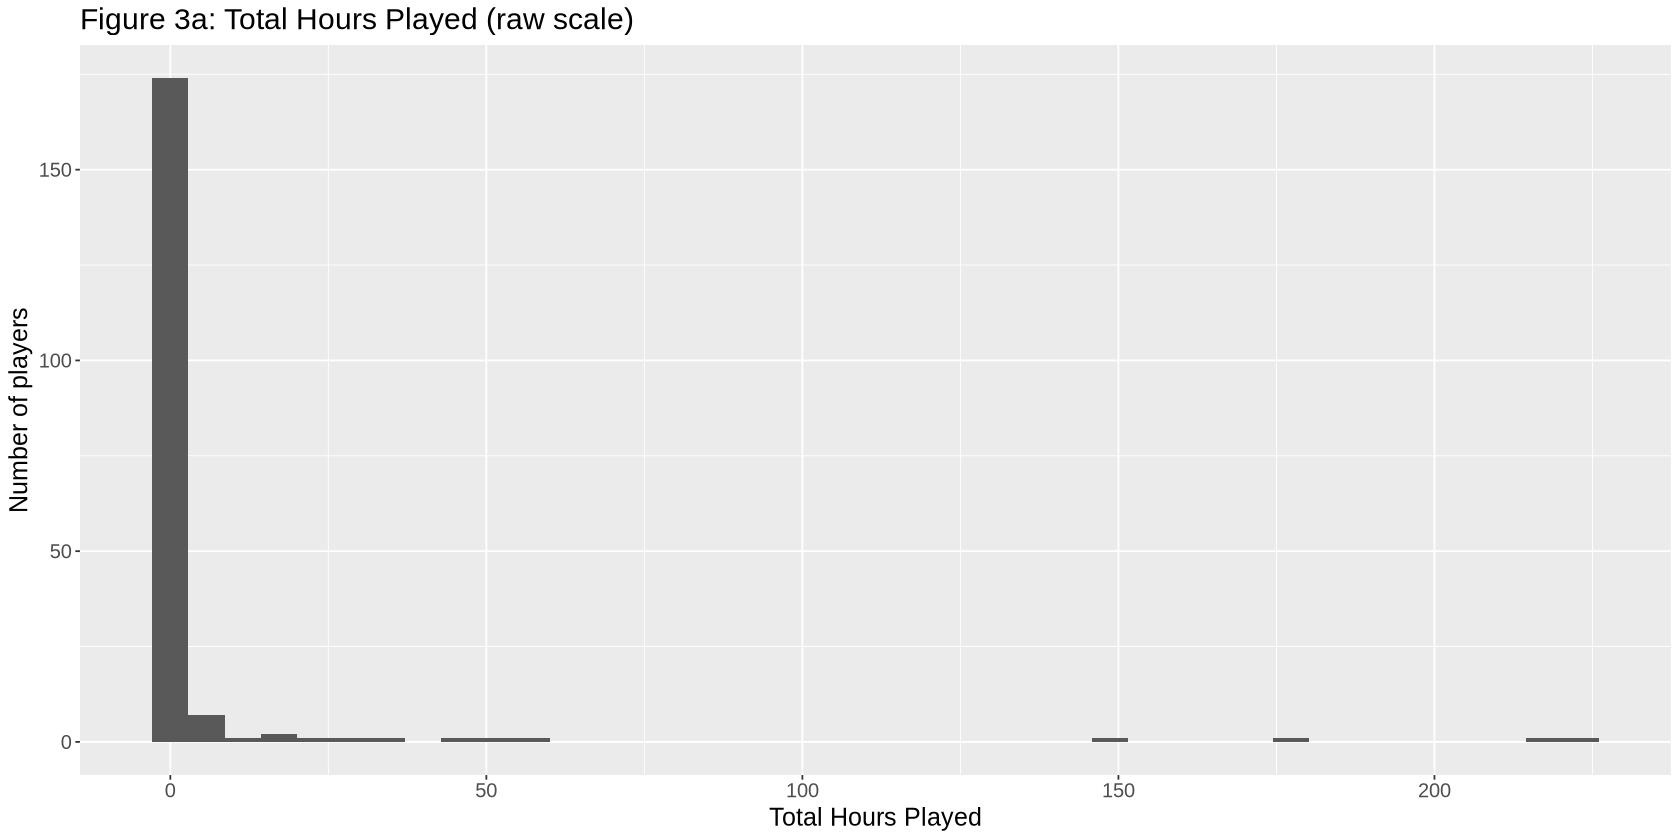

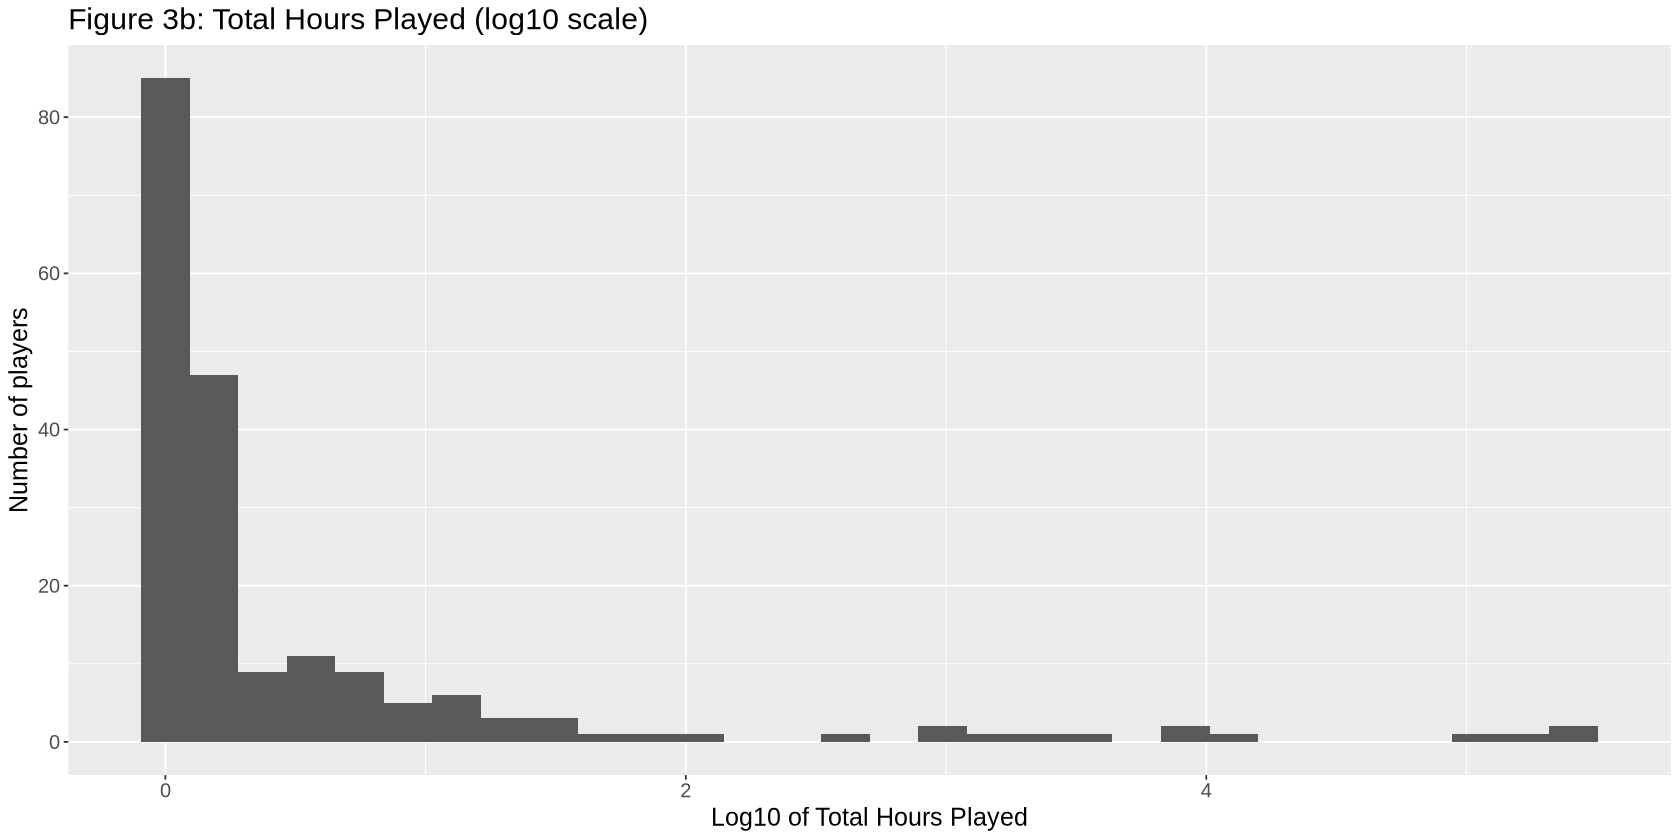

In [9]:
raw_time_played <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 40) +
    labs(x = "Total Hours Played", y = "Number of players", title = "Figure 3a: Total Hours Played (raw scale)") +
    theme(text = element_text(size = 15))
raw_time_played


log_time_played <- players |>
    ggplot(aes(x = log_played_hours)) +
    geom_histogram(bins = 30) +
    labs(x = "Log10 of Total Hours Played", y = "Number of players", title = "Figure 3b: Total Hours Played (log10 scale)") +
    theme(text = element_text(size = 15))
log_time_played

The vast majority of registered players did not rack up any amount of time on the server. Therefore, the majority of registered users either haven't played on the server or have spent such an insignificant amount of time on the server that their time played has rounded down to 0. Many users register but do not meaningfully play or interact with the server. This confirms our initial thought, it shows the distribution of play hours is highly right skewed. This supports the need to consider possible transformations like log for example in later analysis.

##### Log version
There is relatively large contingent of casual players, i.e those who have contributed and interacted with the server but not to an extreme degree. This spans from about log .8 to log 2.5 (anywhere from 6 minutes to 5 hours on the server). Most players who have actually interacted with the server still show low-moderate playtime. The tail of the graph showcases small numbers of highly dedicated players, ranging from log 3-4 (anywhere from 15-150+ hours). There's a very small but very dedicated playerbase, leading to a small but long tail in the data.


#### Playtime by Subscription Status

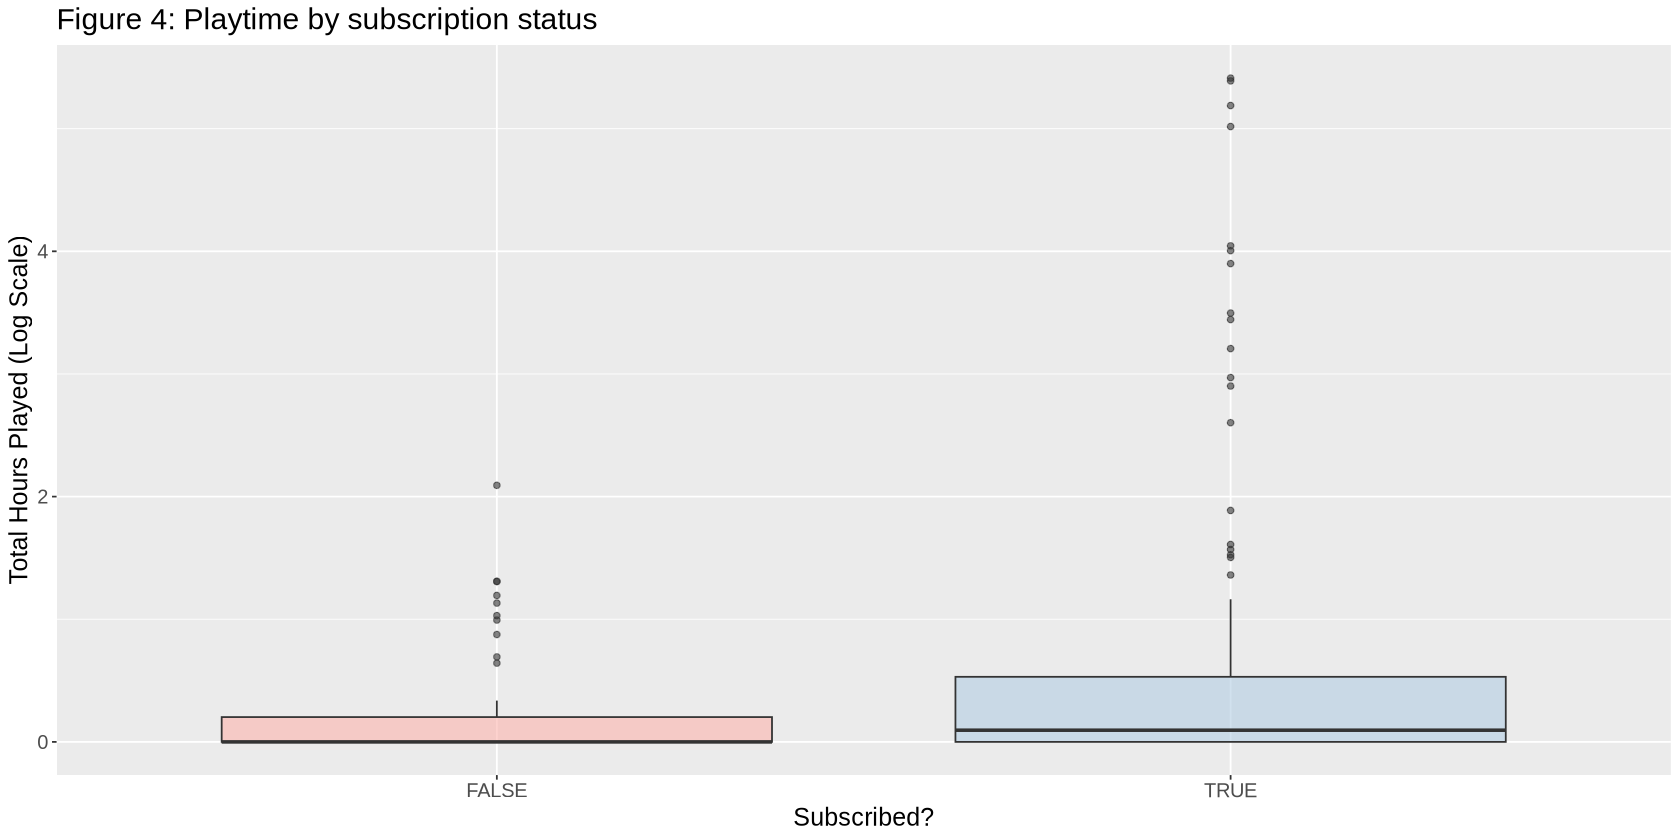

In [10]:
playtime_subscription <- players |>
    ggplot(aes(x = subscribe, y = log_played_hours, fill = subscribe)) +
    geom_boxplot(alpha = 0.6, outlier.alpha = 0.6) +
    labs(x = "Subscribed?", y = "Total Hours Played (Log Scale)", title = "Figure 4: Playtime by subscription status") +
    theme(legend.position = "none") +
    scale_fill_brewer(palette = 'Pastel1') +
    theme(text = element_text(size = 15))
playtime_subscription

Subscribers tend to rack up more playtime than non-subscribers. This is shown in the higher median playtime for subscribers, though this difference is not extraordinary. The variability of playtime for subscribers is much greater than for non-subscribers, with the upper whisker of the subscriber plot spanning significantly further than for non-subscribers (approximately log 4.2 vs log 2.8 respectively). Additionally the box height for subscribers is also slightly taller. Though the statistics for subscriber playtime demonstrate a greater presence of highly dedicated players, both sets include users with little to no playtime. We also see more users with more total hours played when they are subscribed.


#### Ages in Each Experience Level

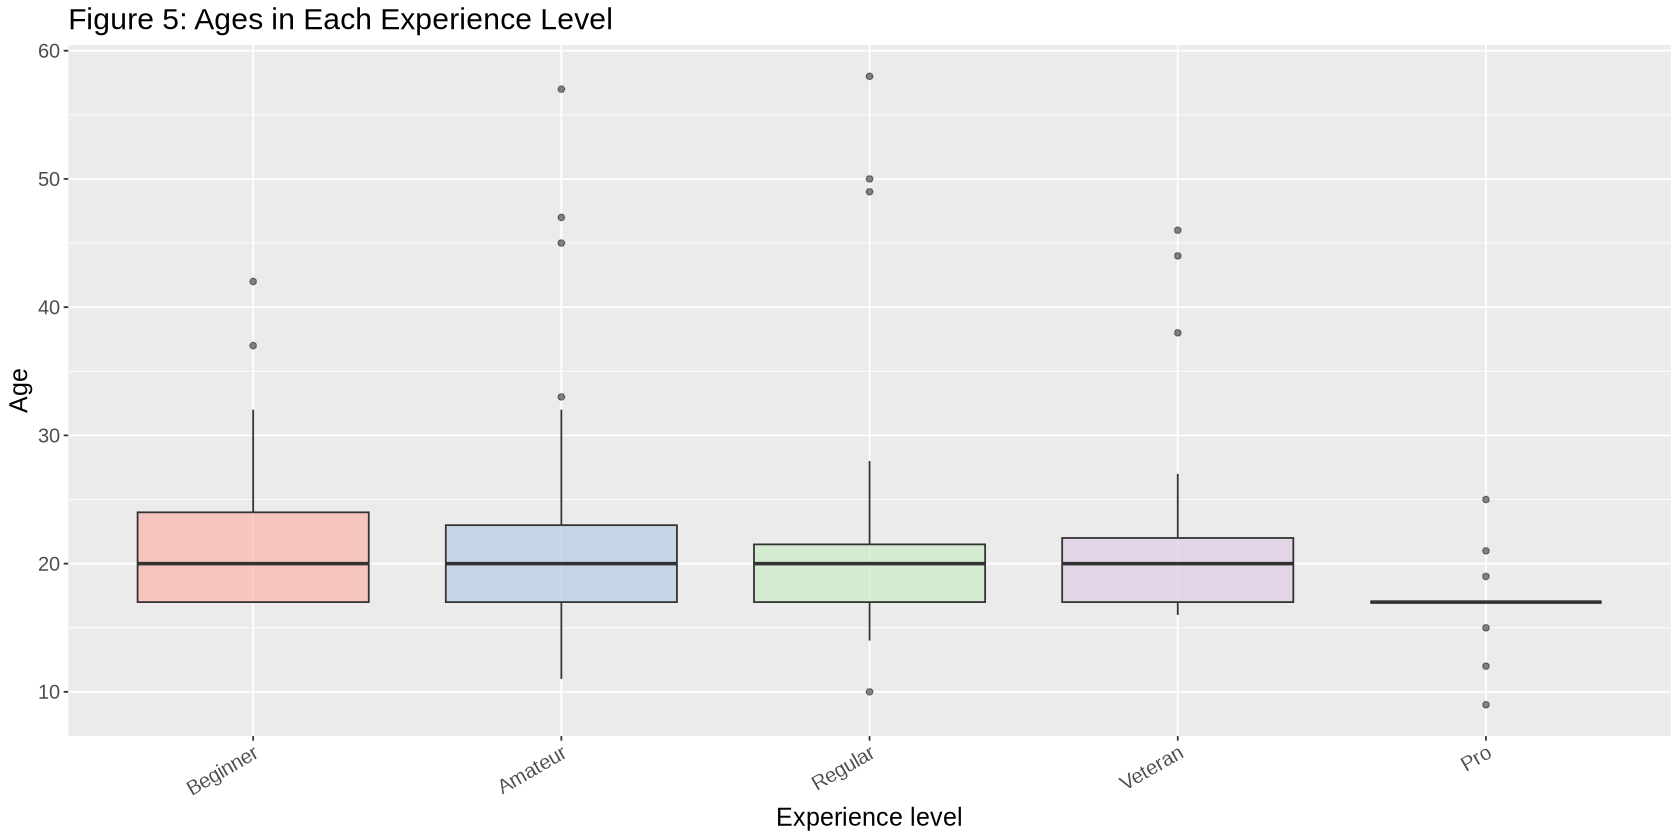

In [11]:
playtime_experience <- players |>
    ggplot(aes(x = experience, y = age, fill = experience)) +
    geom_boxplot(alpha = 0.7, outlier.alpha = 0.6) +
    labs(x = "Experience level", y = "Age", title = "Figure 5: Ages in Each Experience Level") +
    theme(axis.text.x = element_text(angle = 30, hjust = 1), legend.position = "none") +
    scale_fill_brewer(palette = 'Pastel1')+
    theme(text = element_text(size = 15))
playtime_experience 

The medians for all experience levels are remarkably similar to each other, with all of them laying around 20 years. If experience level were directly tied to age there would likely be a more noticeable trend. Though the median for the pro tier, the highest experience level, is slightly lower, it's not significantly lower than the rest of the levels. Additionally, the greatest outliers are actually in the amateur and regular tiers. Skill and level progression are likely not directly to age. Perhaps this is tied to specific in-game Minecraft mechanics. However, we will take a closer look with a K-NN classification model later on in our analysis.

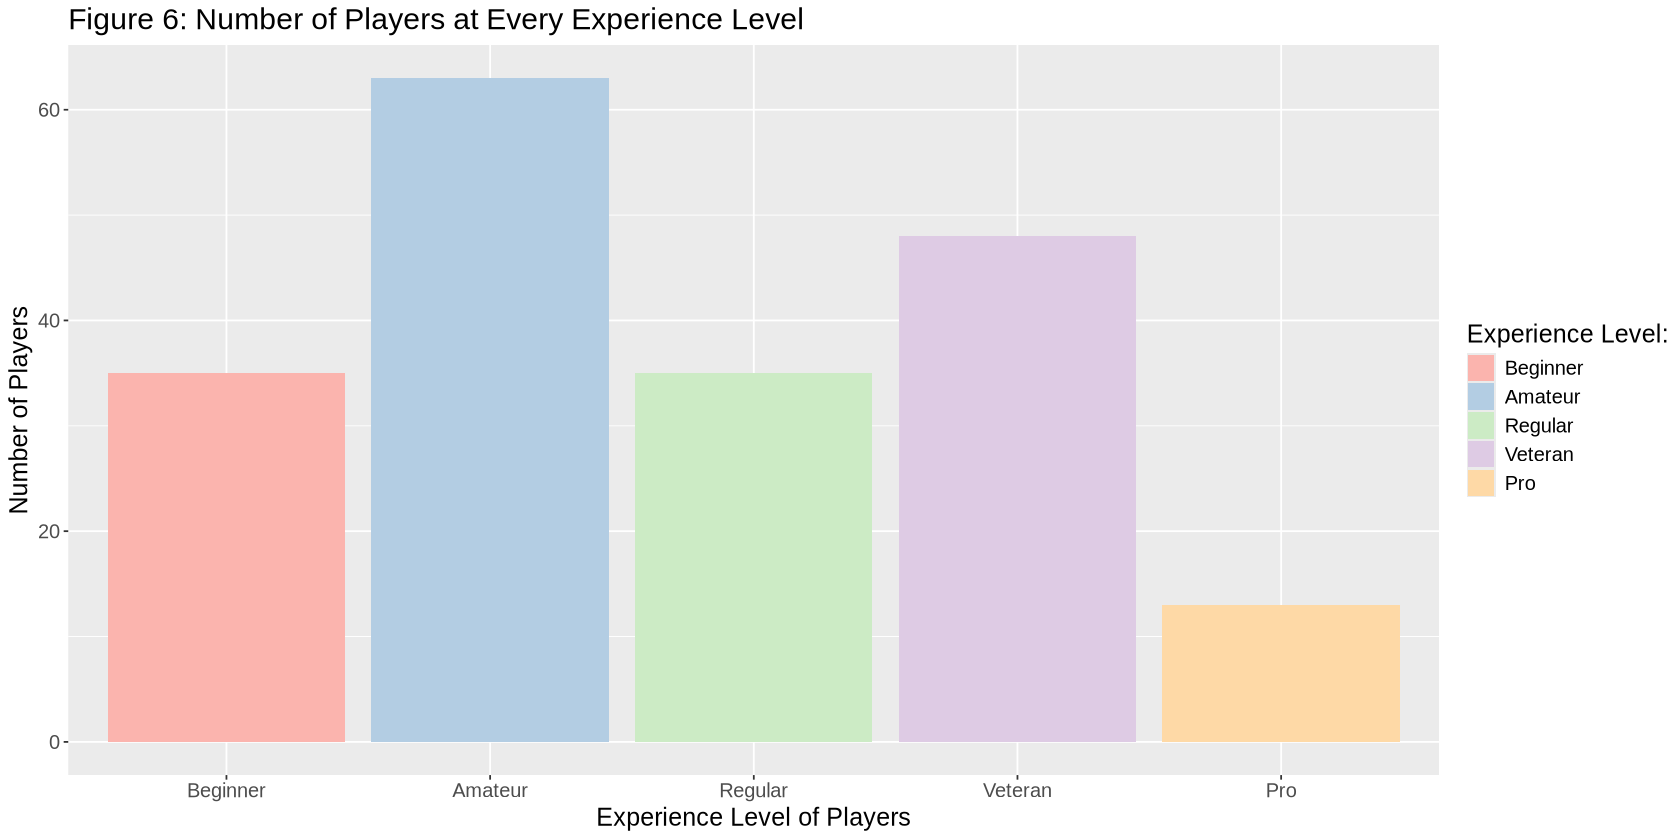

In [12]:
players_per_experience <- players|>
    group_by(experience) |>
    summarize(count = n()) |>
    ggplot(aes(x = factor(experience, levels = c('Beginner', 'Amateur', 'Regular', 'Veteran', 'Pro')), y = count, fill = experience)) + 
    geom_bar(stat = "identity") +
    labs(x = 'Experience Level of Players', y = 'Number of Players', title = 'Figure 6: Number of Players at Every Experience Level', fill = 'Experience Level:') + 
    scale_fill_brewer(palette = 'Pastel1') +
    theme(text = element_text(size = 15))
players_per_experience

This bar graph helps visualize the number of players at every experience level, and from this we can see that the experience level with the most amount of players is 'Amateur', while 'Pro' is the experience level with the least amount of players. Additionally, there is a very similar amount of Beginners and Regulars, with a slightly larger amount of Veterans. From this, we can see that the majority of players fall around the amateur level, with more players being closer to a Regular or Beginner level compared to a Pro level. Comparing this with our previous plot, Figure 5, we see that despite there being a difference in number of players at each experience level, their relative ages are around the same, of course with more outliers occuring in the levels with more players, such as in the 'Amateur' level.

### Approach

#### Proposed Method

To investigate whether age predicts experience level and hours played, we considered the following approaches:

<!--Guys mabye we use knn, but the only issue there is, experience leevel is an orderning so an ordinal logistic regression is the most logicall even though we never had this in class -->
* Ordinal logistic regression for predicting experience level (ordered categories: Beginner -> Pro).

* Linear regression for predicting total hours played (log transformed to reduce skewness).

* KNN regression as an alternative non-parametric approach for both outcomes to see if local patterns differ from parametric models.

This approach allows us to compare parametric and non-parametric models and will show which captures the relationships most effectively

#### Why This Method Is Appropriate

* Ordinal logistic regression respects the natural order in experience levels, making it suitable for ordinal outcomes.

* linear regression is appropriate for continuous numeric outcomes like played hours, especially after log transformation to handle skewness.

* KNN regression is non-parametric so it makes no assumptions about the functional form between age and the outcomes.

#### Assumptions

##### General Assumptions About Our Data:
* We are assuming that data collected from the PLAICraft server is representative of the player base we will analyze, and that the sample of 196 players accurately reflects the entire population of interest.
* Each player and their respective data in the players.csv dataset is unique and independent of other players, and each player's age or experience level is not statistically dependent on any other player.
* All values within the dataset are recorded accurately, and excluding any NAs, the rest of the recorded data is accurate and not manipulated in any way.

##### Linear Regression Assumptions:
* We are assuming that there is a linear relationship between Age (the predictor) and played_hours (the outcome)
* assuming that any outliers or residuals are evenly distributed throughout the time_played data, and that doing a log transformation (as our data is right-skewed) will help highlight the normality of the data, and that the aforementioned residuals are distributed evenly across all age groups (one or a select few age groups don't have all of the residuals or outliers)

#####  Missing Data Values (and zeros) Assumptions:
* As previously mentioned, any NAs, specifically found in the Age of players can be excluded and removed from the data without any significant impact on the overall trends, as these NAs are sparse and shouldn't lead to any unfairness.
* We are assuming that players with played_hours of 0.0 are valid, as they likely joined the research but never played. By transforming the value in our linear regression through a log transformation (log(played_hours + 1)) , these values of 0.0 won't impact the data drastically.

### Linear Regression and K-NN Regression (Predicting Time Played and Experience Level using Age)

#### Age Predicting Time Played:

Moving on, we used a linear regression and K-NN regression model to predict the total time played based on the player's age. Additionally, to account for the skew in Figure 1, we used the log-transformed `played_hours` which is `log_played_hours`. Calculated using `log(played_hours + 1)`.

In [13]:
players_split <- initial_split(players, prop = 0.75, strata = log_played_hours)   #im using log_played_hours instead of played_hours here to account for the 0.0 values!
players_train <- training(players_split)
players_test <- testing(players_split)

In [14]:
# Linear Regression!
set.seed(9999)
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(log_played_hours ~ age, data = players_train)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(data = players_train)

lm_fit

lm_test_results <- lm_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    metrics(truth = log_played_hours, estimate = .pred)

lm_test_results

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
   0.514404    -0.001062  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.12223168
rsq,standard,0.03972985
mae,standard,0.68562509


Here we see that the Linear Regression Model's calculated RMSPE is 1.2130 for Age predicting Hours Played!

Below we are tuning to find best `n` number of neighhbours for our K-NN regression:

In [15]:
set.seed(9999)
knn_recipe_tune <- recipe(log_played_hours ~ age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_vfold <- vfold_cv(players_train, v = 5, strata = log_played_hours)

knn_wkflw_tune <- workflow() |>
  add_recipe(knn_recipe_tune) |>
  add_model(knn_spec_tune)

gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 5))

knn_tune_results <- knn_wkflw_tune |>
  tune_grid(resamples = knn_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

knn_min_tune <- knn_tune_results |>
  filter(mean == min(mean))

knn_min_tune |>
    select(neighbors) |>
    pull()

[1] 26

In [16]:
# K-NN Regression!
set.seed(9999)
knn_recipe <- recipe(log_played_hours ~ age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 26) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_metrics <- predict(knn_fit, players_test) |>
    bind_cols(players_test) |>
    metrics(truth = log_played_hours, estimate = .pred)

knn_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.191810851
rsq,standard,0.004629002
mae,standard,0.627562000


Here we see that the K-NN Regression Model's calculated RMSPE is 1.2624 for Age predicting Hours Played!

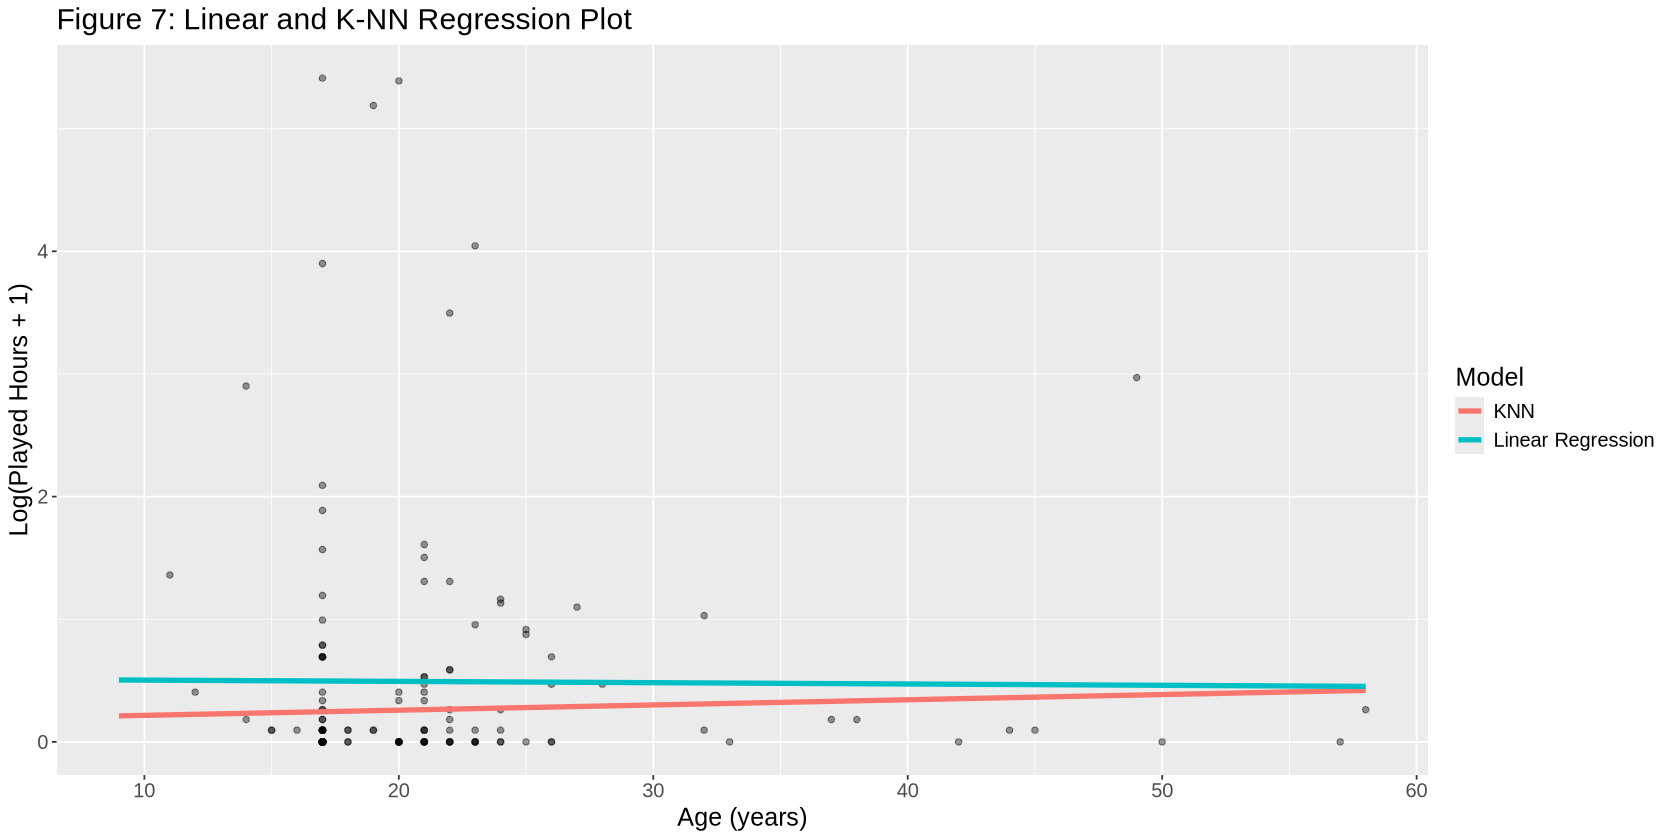

In [17]:
# Plotting Linear and K-NN Regression Models!
set.seed(9999)
age_prediction_grid <- tibble(
    age = c(players |> select(age) |> min(), 
            players |> select(age) |> max() ) )

lm_preds <- lm_fit |>
    predict(age_prediction_grid) |>
    bind_cols(age_prediction_grid) |>
    mutate(Model = "Linear Regression")

knn_preds <- knn_fit |>
    predict(age_prediction_grid) |>
    bind_cols(age_prediction_grid)|>
    mutate(Model = "KNN")

options(repr.plot.width = 14, repr.plot.height = 7)
regression_age_plot <- bind_rows(knn_preds, lm_preds) |>
    ggplot(aes(x = age, y = .pred, color = Model)) +
    geom_point(data = players_train, aes(y = log_played_hours), alpha = 0.4, color = 'Black') +
    geom_line(linewidth = 1.5) +
    labs(x = "Age (years)", y = "Log(Played Hours + 1)", title = "Figure 7: Linear and K-NN Regression Plot") +
    theme(text = element_text(size = 15))

regression_age_plot

#### Age Predicting Experience Level:

Following the Age vs Hours Played regression, we'll use a classification model to predict the experience levels of players based on their age. Below we first are finding the best `n` number of neighbours for our model, followed by the classification itself:

In [18]:
set.seed(9999)
knn_recipe_tune_2 <- recipe(experience ~ age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec_tune_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_vfold_2 <- vfold_cv(players_train, v = 5, strata = experience)

knn_wkflw_tune_2 <- workflow() |>
  add_recipe(knn_recipe_tune_2) |>
  add_model(knn_spec_tune_2)

gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 5))

knn_tune_results_2 <- knn_wkflw_tune_2 |>
  tune_grid(resamples = knn_vfold_2, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

knn_min_tune_2 <- knn_tune_results_2 |>
  filter(mean == max(mean))

knn_min_tune_2 |>
    pull(neighbors)

[1] 6

In [19]:
# K-NN Classification!
class_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>    #neighbours = 21
    set_engine("kknn") |>
    set_mode("classification")

class_recipe <- recipe(experience ~ age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

class_fit <- workflow() |>
    add_recipe(class_recipe) |>
    add_model(class_spec) |>
    fit(data = players)

class_metrics <- predict(class_fit, players_test) |>
    bind_cols(players_test) |>
    metrics(truth = experience, estimate = .pred_class) |>
    filter(.metric == 'accuracy')

class_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4693878


This tells us that when age is used to predict experience level, it is correct 57.14% of the time. 

## Discussion

#### Summary of our findings

While we summarized each figure as we went through them in the Methods + Results section, focusing more on the relationship between Age (age) and Hours Played (played_hours), we see in both of our regression models that there is a slightly negative trend, where as age increases, the log10 of the number of hours played decreases. Additionally, we see that both regression lines follow a linear path, which makes sense for the linear regression, and for the K-NN regression, tells us that there aren’t any distinct or complex trends.

Based on the fact that both lines are linear, and also that the linear regression has a slightly lower RMSPE, 1.2130 (linear regression) vs 1.2624 (K-NN regression), the relationship between Age vs Hours Played is linear, with a slightly negative trend.

Moving onto the K-NN Classification of Age predicting Experience Level, we see that age only correctly and accurately predicts experience level around 57.14% of the time. Being just slightly over 50%, aka a coin toss, age cannot be used to accurately predict experience all the time.

#### Expected Results?
Reminder of Our Question: *Can age be used to predict the number of hours played and experience level on the server?*

We expected that age would have some influence on hours played with younger players showing higher engagement. This expectation is logical and it comes from general gaming trends, where younger people often have more free time and a stronger interest in gaming than older people.

The analysis confirms this expectation to some degree, both models have a slightly negative trend, so as the age increases, the hours played tend to decrease. The linear regression model fits slightly better with an RMSPE of 1.2130 compared to the KNN regression model with an RMSPE of 1.2624, suggesting that the relationship is quite linear. Based also on Figure 2, we notice that the distribution of the ages playing the game is somewhat skewed. There are more younger players than older players, which again confirms our expectations.

Overall, the expected result, that younger players tend to play more with the server, was observed.

In terms of the relationship between age and experience level, we expected that it would not be able to fully predict experience. We expected this as it makes sense that since the players who are participating in this study are primarily university students who fall between the 18-25 (and overall younger) age range, the age would be biased, and as a result, regardless of experience level, the age group will be skewed. Also, players participating in the study likely already have been playing Minecraft or know about it, further introducing another bias that impacts how accurately age is able to predict experience level. Factoring in these biases, we expected age not to fully predict experience level to some degree, and an accuracy of around 57% makes sense

#### Impact of Findings

The negative linear relationship between age and played hours suggests that younger players tend to engage more with the game. This findings has somewhat practical implications:

* Marketing
Knowing which age group tends to engage more with the game, marketing teams can invest more in campaigns at a younger audience, since they are statistically more likely to become high-engagement players.
* Game design
If younger users are more active, this studio may prioritize features that appeal to this demographic.
* Monetization
Based on Figure 1, we notice that younger people also tend to subscribe more, which means maybe younger audiences are also responsive to awards, battle passes etc.
Overall, the findings provide a clearer understanding of how age shapes player engagement, which can guide decisions across design, marketing and monetization.


#### Future Questions

The analysis revealed a clear negative linear relationship between Age and Hours Played, with younger players showing higher engagement. This raises several analytical questions. For example, are there specific life factors that mediate this negative relationship, such as free time, employment status or education?

We can also explore whether younger players are the highest contributors in terms of revenue or if older players, who are less engaged, contribute more revenue per hour played.

In terms of modelling, we should consider whether the models we used are the best option. Our best model has an RMSPE of 1.2130, but it may be worth exploring more powerful models, such as decision trees or Random Forests. These models can better capture nonlinear relationships and help identify important feature splits in player data, potentially improving performance. Also, for our KNN classification model, we could try different models to improve our score, since our score is pretty low. Again, models like random forest, decision trees, etc.

## GitHub Link
Below is the link to our group project GitHub repository:

https://github.com/Aki175/Project-Final-Report